#Step 1. Defining Problem Statement.

##Problem statement Introduction:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors


##Business Problem:
Delhivery, a leading logistics company in India, faces challenges in maximizing the value of its extensive data resources.

The key issues are:

1. Efficiently cleaning and transforming raw data to extract useful features.

2. Supporting the data science team with well-processed data to develop reliable forecasting models.

Addressing these issues will enhance the company's operational efficiency, competitiveness, and profitability.

#1. Basic data cleaning and exploration:

In [582]:
#importing required libraries.
import pandas as pd
import numpy as np

In [583]:
#Loading dataset dataset.
df=pd.read_csv("/content/delhivery_data.csv")

In [584]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [585]:
df.shape

(144867, 24)

In [586]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [587]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [589]:
unknwn_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(columns = unknwn_columns,inplace=True)

In [590]:
df.shape

(144867, 19)

##1. Handling missing values in the data.

In [591]:
#Checking for missing values in the dataset.
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [592]:
source_name_missing = df.loc[df['source_name'].isnull(), 'source_center'].unique()
print(source_name_missing)

['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND509103AAC' 'IND126116AAA' 'IND331022A1B'
 'IND505326AAB' 'IND852118A1B']


In [593]:
destination_name_missing = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
print(destination_name_missing)

['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND505326AAB' 'IND852118A1B' 'IND126116AAA'
 'IND509103AAC' 'IND221005A1A' 'IND250002AAC' 'IND331001A1C'
 'IND122015AAC']


In [594]:
count = 1

# Replace missing destination_name based on destination_center
for i in destination_name_missing:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].fillna(f'location_{count}')
    count += 1

In [595]:
# Replace missing source_name based on source_center using a dictionary
d = {}
for i in source_name_missing:
    d[i] = df.loc[df['source_center'] == i, 'source_name'].dropna().unique()

# Handle cases where no unique values are found for missing source_name
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1

# Map source_center to the corresponding destination_name
d2 = {k: v[0] for k, v in d.items()}

In [596]:
# Replace missing source_name using the mapped values in d2
for i in source_name_missing:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].fillna(d2[i])

In [597]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

##2. Converting time columns into pandas datetime.

In [598]:
#Converting time columns into pandas datetime.
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [599]:
#Converting data type of categorical columns
df['route_type'] = df['route_type'].astype('category')

##3. Analyze structure & characteristics of the dataset.

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [601]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370
std,NaN,NaN,NaN,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066


#2. Try merging the rows using the hint mentioned below.

##1. Grouping by segment

###a. Creating a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and name it as segment_key.

In [602]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

### b. Using inbuilt functions like groupby and aggregations like cumsum() to merge the rows in columns segment_actual_time,segment_osrm_distance, segment_osrm_time based on the segment_key.

In [603]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [604]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


##2. Aggregating at segment level

###a. Creating a dictionary named create_segment_dict, that defines how to aggregate and select values.

###i. keeping the first and last values for some numeric/categorical fields if aggregating them won’t make sense.

In [605]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

###b & c. Grouping the data by segment_key because you want to perform aggregation operations for different segments of each trip based on the segment_key value & The aggregation functions specified in the create_segment_dict are applied to each group of rows with the same segment_key.

In [606]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

###d. Sorting the resulting DataFrame segment, by two criteria:

i. First, sorting it by segment_key to ensure that segments are
ordered consistently.


ii. Second, sorting it by od_end_time in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.

In [607]:
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [608]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


#3. Feature Engineering:

##1. Calculating time taken between od_start_time and od_end_time and keeping it as a feature named od_time_diff_hour.

In [609]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26363      62.115193
26364      91.087797
26365      44.174403
26366     287.474007
26367      66.933565
Name: od_time_diff_hour, Length: 26368, dtype: float64

##2. Grouping and Aggregating at Trip-level

###Creating create_trip_dict dictionary.

In [610]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

###b. Grouping the segment data by the trip_uuid column to focus on aggregating data at the trip level.

In [611]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [612]:
trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [613]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


##3. Destination Name: Split and extract features out of destination. City-place-code(State)

In [614]:
trip['destination_name'] = trip['destination_name'].str.lower() #lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [615]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')
    if len(state)==1:
      return state[0]
    else:
      return state[1].replace(')', "") #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [616]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [617]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14812,punjab,chandigarh,mehmdpur,h
14813,haryana,faridabad,blbgarh,dc
14814,uttar pradesh,kanpur,govndngr,dc
14815,tamil nadu,tirchchndr,shnmgprm,d


##4. Source Name: Split and extract features out of destination. City-place-code (State)

In [618]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [619]:
trip[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none
...,...,...,...,...
14812,punjab,chandigarh,mehmdpur,h
14813,haryana,fbd,balabhgarh,dpc
14814,uttar pradesh,kanpur,govndngr,dc
14815,tamil nadu,tirunelveli,vdkkusrt,i


##5. Trip_creation_time: Extract features like month, year, day, etc.

In [620]:
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [621]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14812,2018,10,23,3,40,2
14813,2018,10,23,3,40,2
14814,2018,10,23,3,40,2
14815,2018,10,23,3,40,2


In [622]:
trip.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN
start_scan_to_end_scan,14817.0,530.810016,23.0,149.0,280.0,637.0,7898.0,658.705957
od_time_diff_hour,14817.0,531.697682,23.461468,149.930591,280.765626,638.199071,7898.551955,658.868299
actual_distance_to_destination,14817.0,164.477838,9.002461,22.837239,48.474072,164.583208,2186.531787,305.388147
actual_time,14817.0,357.143754,9.0,67.0,149.0,370.0,6265.0,561.396157
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.360995
osrm_distance,14817.0,204.344689,9.0729,30.8192,65.6188,208.475,2840.081,370.395573
segment_actual_time_sum,14817.0,353.892286,9.0,66.0,147.0,367.0,6230.0,556.247965
segment_osrm_distance_sum,14817.0,223.201161,9.0729,32.6545,70.1544,218.8024,3523.6324,416.628374
segment_osrm_time_sum,14817.0,180.949787,6.0,31.0,65.0,185.0,2564.0,314.542047


#4. In-depth analysis:

##1. Outlier Detection & Treatment

###a. Finding any existing outliers in numerical features.

In [623]:
trip.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
od_time_diff_hour                        float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time_sum                  float64
segment_osrm_distance_sum                float64
segment_osrm_time_sum                    float64
destination_state                         object
destination_city                          object
destination_place   

In [624]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

###b. Visualizing the outlier values using Boxplot.

<Axes: >

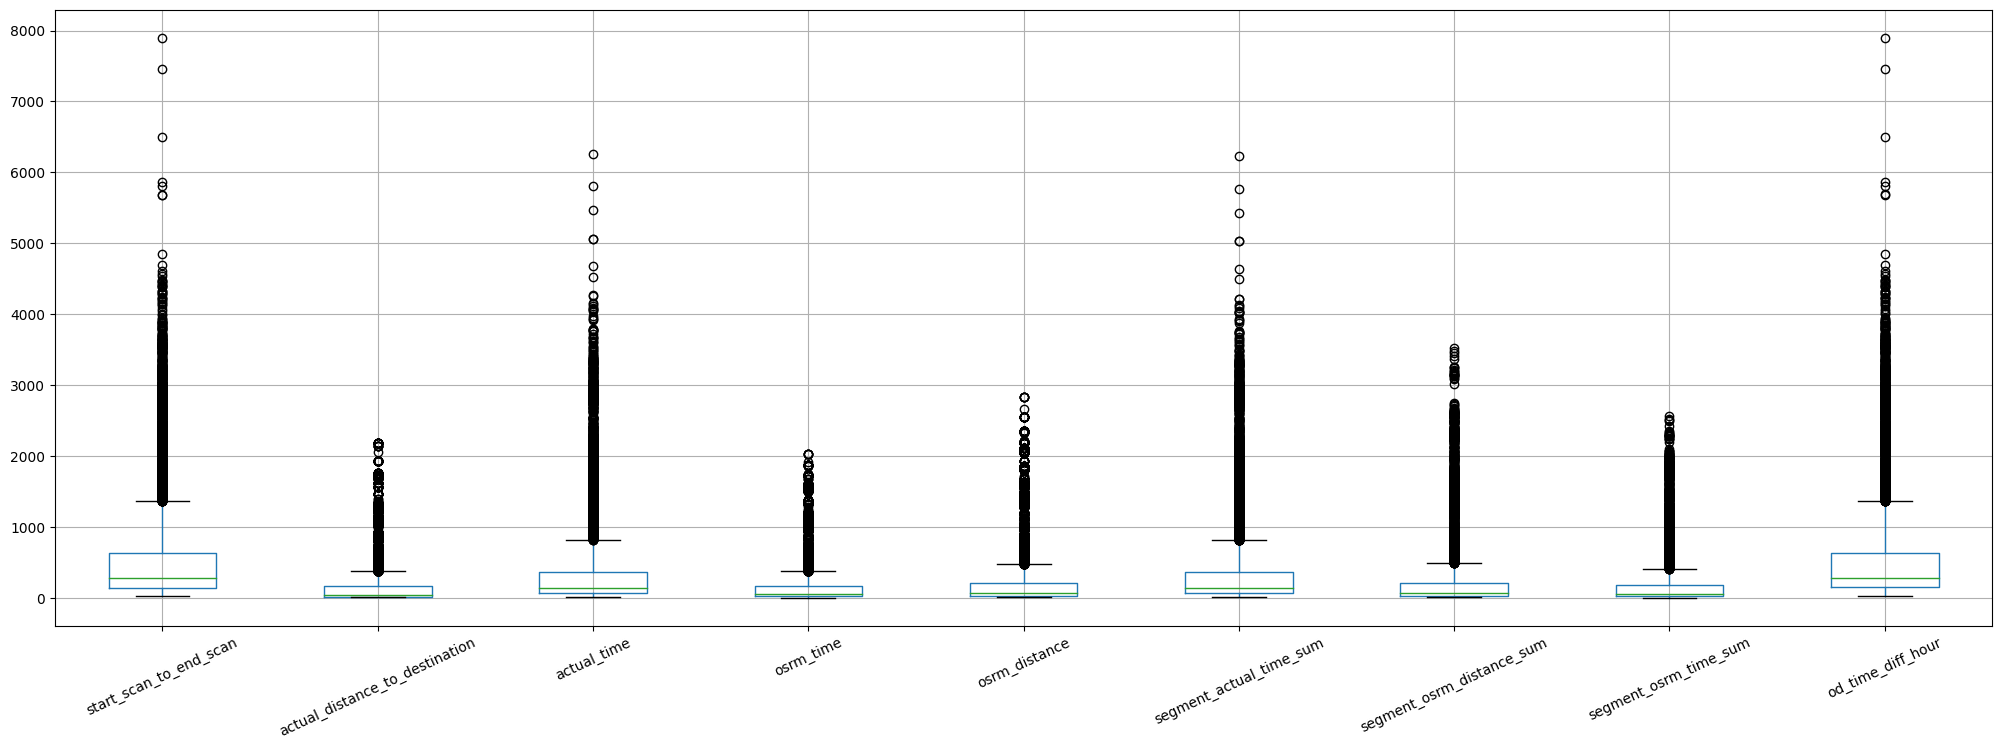

In [625]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

###c. Handling the outliers using the IQR method.

In [626]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [627]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)

In [628]:
trip.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,12759,2018-09-22 13:31:40.651586816,2018-09-12 00:00:22.886430,2018-09-17 03:24:12.859975936,2018-09-22 04:40:54.582994944,2018-09-27 21:01:49.070982144,2018-10-03 23:59:42.701692,NaN
start_scan_to_end_scan,12759.0,322.025237,23.0,136.0,234.0,427.0,1366.0,257.404103
od_time_diff_hour,12759.0,322.872651,23.461468,136.846184,234.371669,427.817233,1367.376591,257.735766
actual_distance_to_destination,12759.0,72.82579,9.002461,21.410516,38.672808,102.959653,373.441224,72.570289
actual_time,12759.0,178.556235,9.0,61.0,115.0,254.0,820.0,159.088778
osrm_time,12759.0,78.977506,6.0,27.0,50.0,111.0,376.0,72.85565
osrm_distance,12759.0,92.380262,9.0729,28.38,48.7159,131.9066,474.1337,90.190704
segment_actual_time_sum,12759.0,176.893487,9.0,60.0,114.0,251.0,818.0,158.036529
segment_osrm_distance_sum,12759.0,98.668152,9.0729,29.4891,54.277,141.45105,497.7929,95.481828
segment_osrm_time_sum,12759.0,86.500039,6.0,28.0,53.0,127.0,413.0,80.159645


<Axes: >

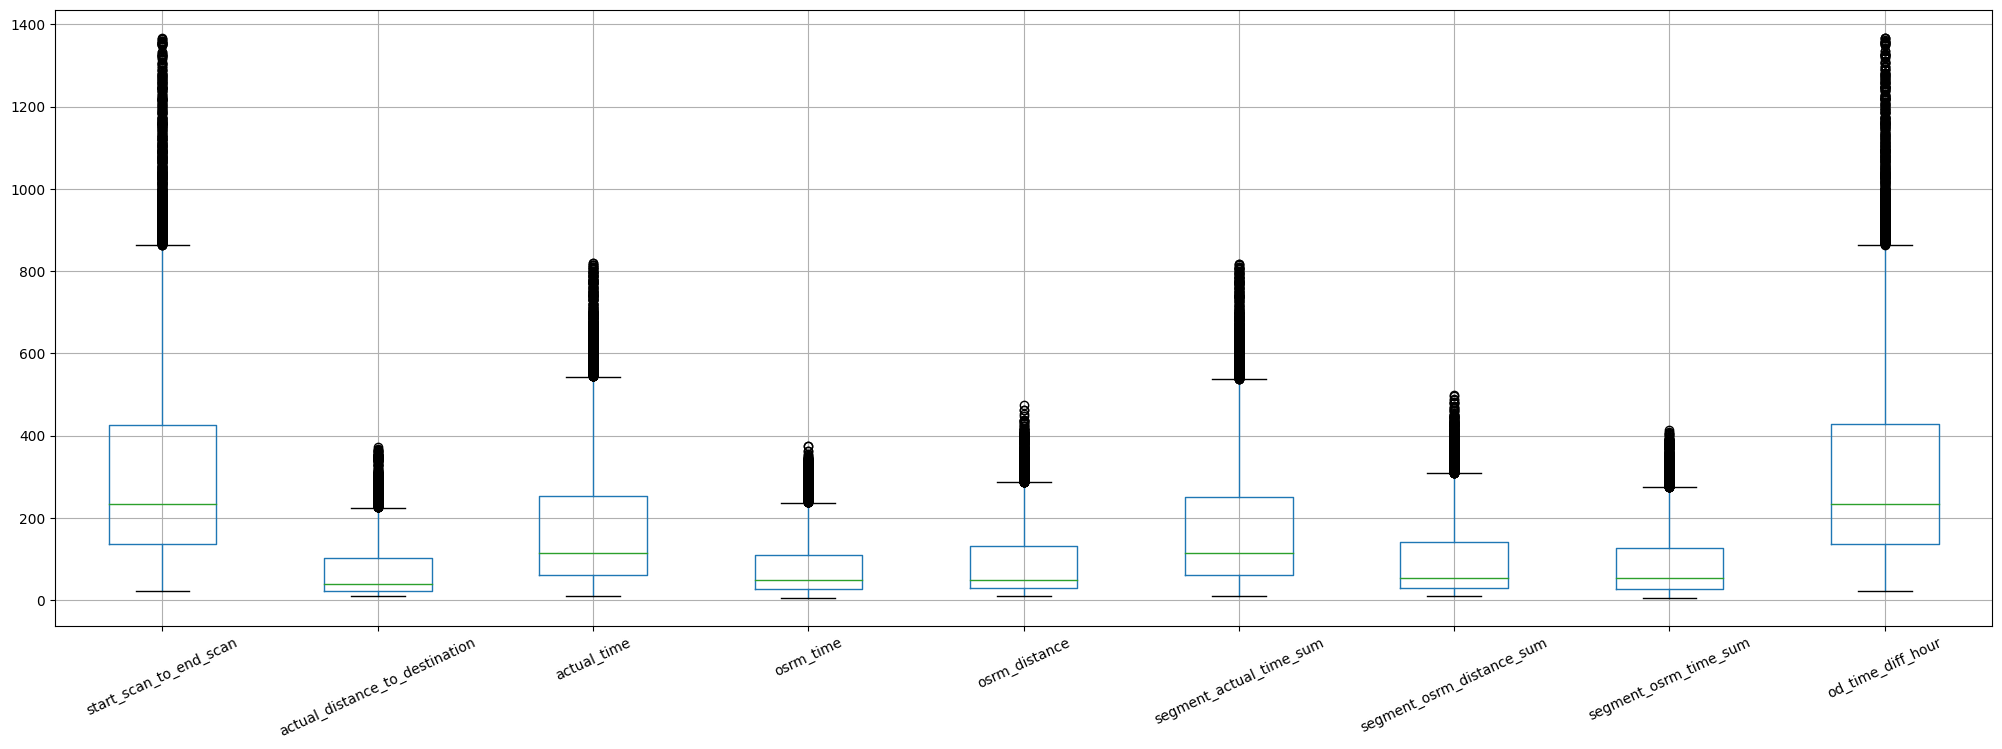

In [629]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

##2. Perform one-hot encoding on categorical features.

In [630]:
trip['route_type'].value_counts()

route_type
Carting    8817
FTL        3942
Name: count, dtype: int64

Insights: Most common route type is Carting.

In [631]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

In [632]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,181.611874
1,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,100.494935
2,717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,718.349042
3,189.0,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,190.487849
4,98.0,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,98.005634
...,...,...,...,...,...,...,...,...,...
12754,257.0,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,258.028928
12755,60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,60.590521
12756,421.0,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,422.119867
12757,347.0,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,348.512862


In [633]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,12759.000000,12759.000000,12759.000000,12759.000000,12759.000000,12759.000000,12759.000000,12759.000000,12759.000000
mean,322.025237,72.825790,178.556235,78.977506,92.380262,176.893487,98.668152,86.500039,322.872651
std,257.404103,72.570289,159.088778,72.855650,90.190704,158.036529,95.481828,80.159645,257.735766
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000,23.461468
25%,136.000000,21.410516,61.000000,27.000000,28.380000,60.000000,29.489100,28.000000,136.846184
50%,234.000000,38.672808,115.000000,50.000000,48.715900,114.000000,54.277000,53.000000,234.371669
75%,427.000000,102.959653,254.000000,111.000000,131.906600,251.000000,141.451050,127.000000,427.817233
max,1366.000000,373.441224,820.000000,376.000000,474.133700,818.000000,497.792900,413.000000,1367.376591


#5. Hypothesis Testing:

##1. Perform hypothesis testing / visual analysis between :

###a. actual_time aggregated value and OSRM time aggregated value.

Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid

Null Hypothesis - There is no difference between actual_time and osrm_time.

Alternative Hypothesis - There is significant difference between actual_time and osrm_time

In [634]:
trip[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,12759.000000,12759.000000
mean,178.556235,78.977506
std,159.088778,72.855650
min,9.000000,6.000000
25%,61.000000,27.000000
50%,115.000000,50.000000
75%,254.000000,111.000000
max,820.000000,376.000000


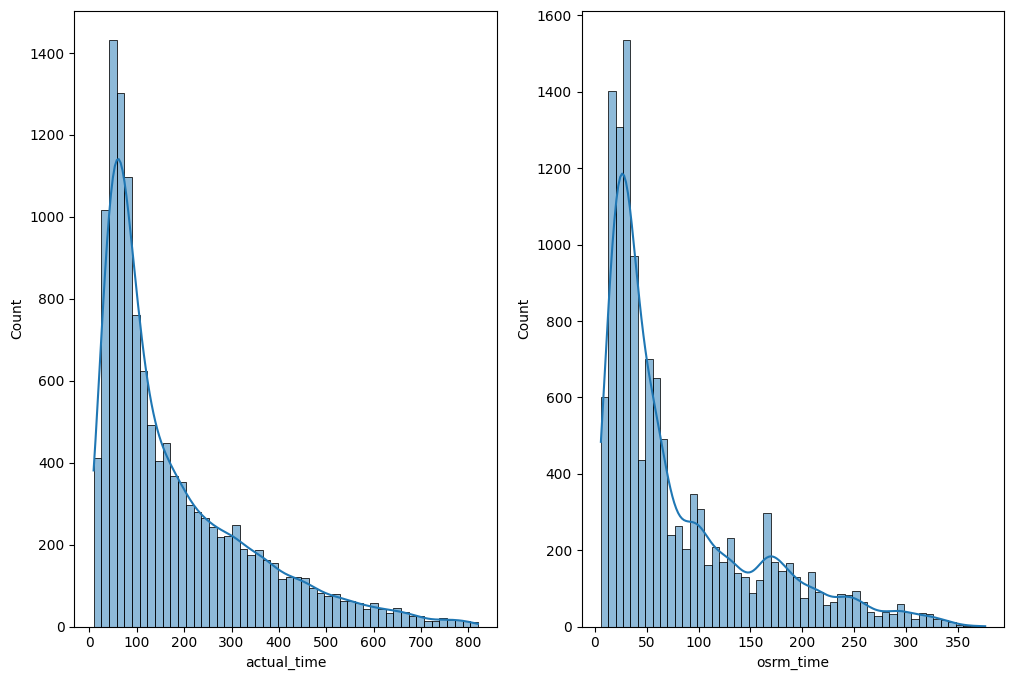

In [635]:
#distribution of actual time and osrm time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.histplot(data = trip['actual_time'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=trip['osrm_time'], kde=True)
plt.show()

Insights:The histograms show that both actual_time and osrm_time is right skewed and not nrmally distributed

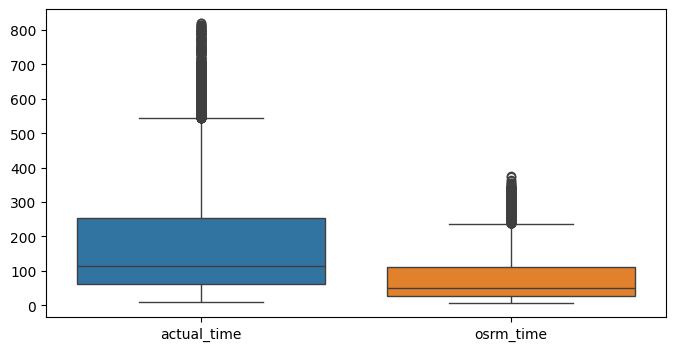

In [636]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = trip[['actual_time','osrm_time']])
plt.show()

Insights: We can clearly see from the box plot that the actual time is much higher than the OSRM time.

<Figure size 1000x400 with 0 Axes>

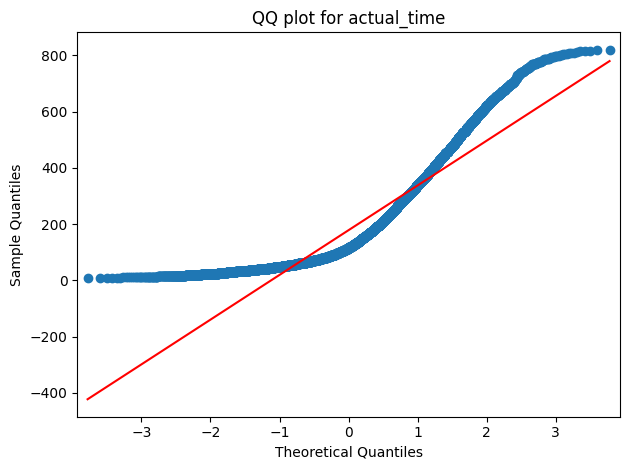

In [637]:
import statsmodels.api as sm
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['actual_time'], line="s")
plt.title('QQ plot for actual_time')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

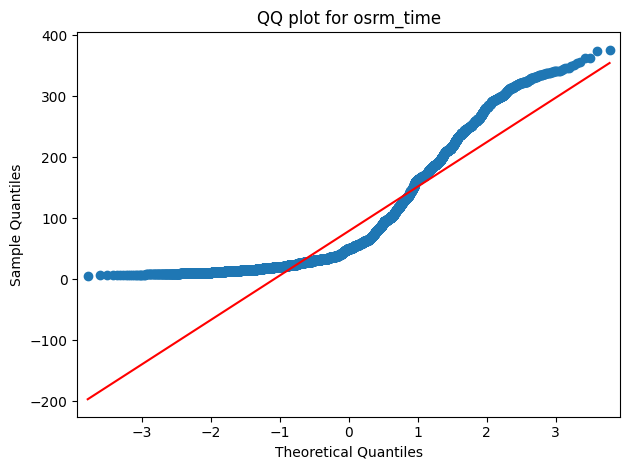

In [638]:
plt.figure(figsize=(10, 4))
sm.qqplot(trip['osrm_time'], line="s")
plt.title('QQ plot for osrm_time')
plt.tight_layout()
plt.show()

samples do not follow normal distribution

####Applying Shapiro-Wilk test

 Ho: The sample follows normal distribution

 H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [639]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(trip['actual_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.729785448040269e-49
The sample does not follow normal distribution


In [640]:
test_stat, p_value = shapiro(trip['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.465429629112036e-60
The sample does not follow normal distribution


####Homogeneity of Variances using Lavene's test

In [641]:
from scipy.stats import levene
test_stat, p_value = levene(trip['actual_time'], trip['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.0
The samples do not have  Homogenous Variance


As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

In [642]:
from scipy.stats import mannwhitneyu

H0="There is no difference between actual_time and osrm_time."
Ha="There is significant difference between actual_time and osrm_time."
alpha = 0.05

u_stat, p_value = mannwhitneyu(trip['actual_time'], trip['osrm_time'])

print('Test Statistic:', u_stat)
print('P value:', p_value)

if p_value < alpha:
  print("Result: \nReject null hypothesis. \n", Ha)
else:
  print("Result: \nFail to reject null hypothesis. \n ", H0)

Test Statistic: 120080730.5
P value: 0.0
Result: 
Reject null hypothesis. 
 There is significant difference between actual_time and osrm_time.


###b. actual_time aggregated value and segment actual time aggregated value.

Null Hypothesis: There is no difference between actual_time and segment_actual_time

Alternative Hypothesis: There is a difference between actual_time and segment_actual_time

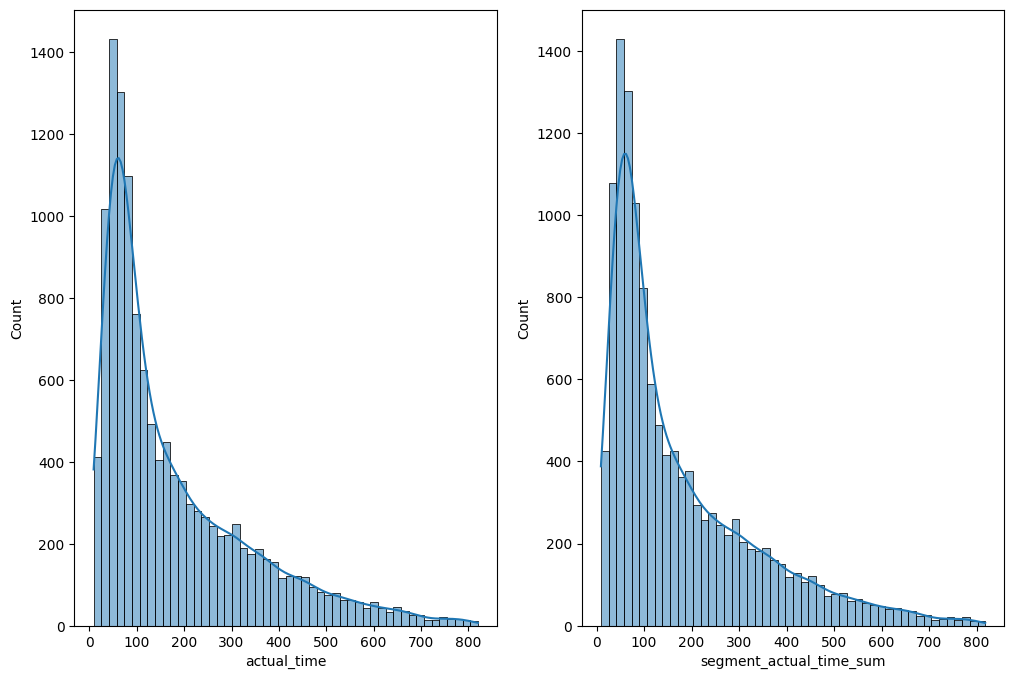

In [643]:
#distribution of actual time and segment actual time

plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.histplot(data = trip['actual_time'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=trip['segment_actual_time_sum'], kde=True)
plt.show()

Both actual time and segment actual time are right-skewed and not normally distributed.

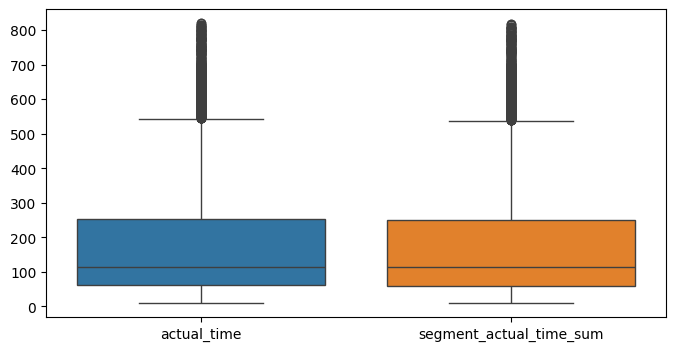

In [644]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = trip[['actual_time','segment_actual_time_sum']])
plt.show()

We can see from the boxplot that the actual time and segment actual time do not differ much.

<Figure size 1000x400 with 0 Axes>

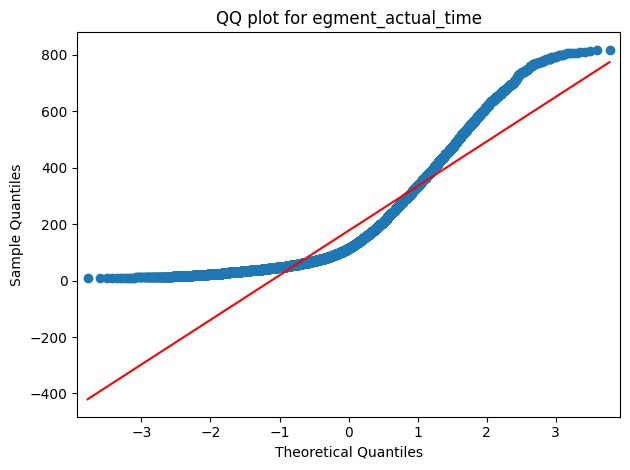

In [645]:
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['segment_actual_time_sum'], line="s")
plt.title('QQ plot for egment_actual_time')
plt.tight_layout()
plt.show()

####Apply Shapiro-Wilk test

Ho: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [646]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(trip['segment_actual_time_sum'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.3100134161197e-49
The sample does not follow normal distribution


####Homogeneity of Variances using Lavene's test

In [647]:
from scipy.stats import levene
test_stat, p_value = levene(trip['actual_time'], trip['segment_actual_time_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.5781800861905502
The samples have Homogenous Variance 


Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

Null Hypothesis: There is no difference between actual_time and segment_actual_time

Alternative Hypothesis: There is a difference between actual_time and segment_actual_time

In [648]:
H0="There is no difference between actual_time and segment_actual_time"
Ha="There is a difference between actual_time and segment_actual_time"
alpha=0.05
test_stat, p_value = mannwhitneyu(trip['actual_time'], trip['segment_actual_time_sum'])
print('p-value', p_value)
if p_value < alpha:
    print("Result: \nReject null hypothesis. \n",Ha)
else:
    print("Result: \nFail to reject null hypothesis. \n",H0)


p-value 0.3350750092211148
Result: 
Fail to reject null hypothesis. 
 There is no difference between actual_time and segment_actual_time


The hypothesis test result confirms our observation from the visual analysis

Insights: it can be concluded that actual_time and segment_actual_time are similar

###c. OSRM distance aggregated value and segment OSRM distance aggregated value.

Null Hypothesis - There is no difference between osrm distance and segment_osrm distance.

Alternative Hypothesis - There is significant difference between osrm distance and segment_osrm distance.

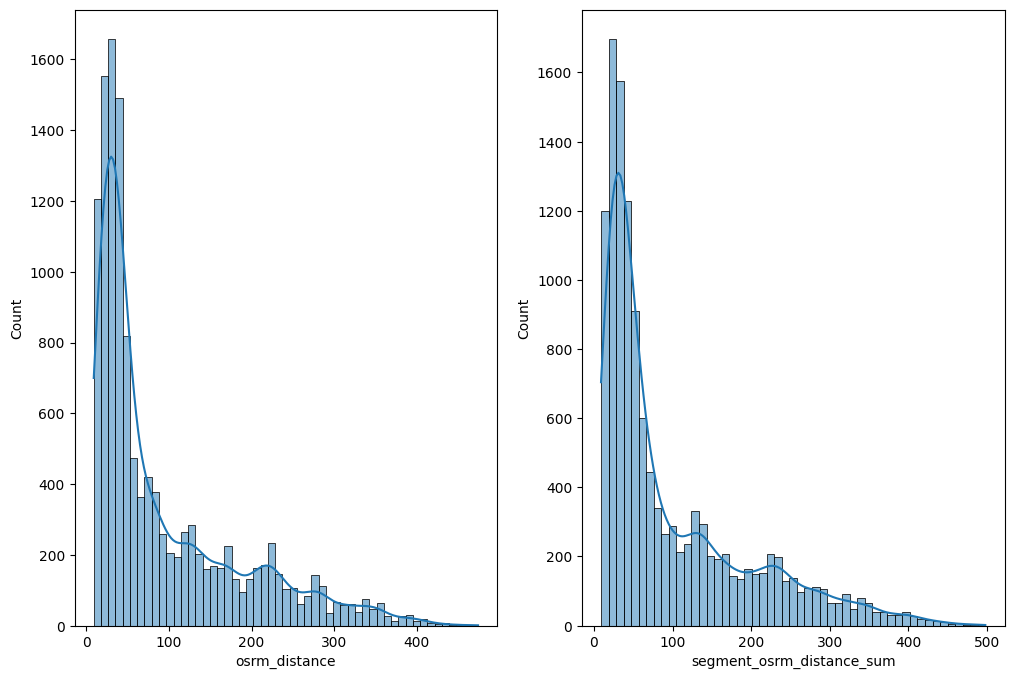

In [649]:
#distribution of osrm distance and segment osrm distance
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.histplot(data = trip['osrm_distance'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=trip['segment_osrm_distance_sum'], kde=True)
plt.show()

Distributions for both parameters are very similar with right-skew

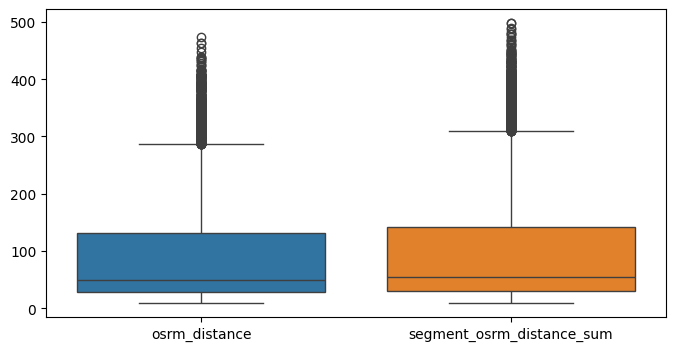

In [650]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = trip[['osrm_distance','segment_osrm_distance_sum']])
plt.show()

The box plot shows a small difference between the mean values of osrm distance and segment osrm distance

<Figure size 1000x400 with 0 Axes>

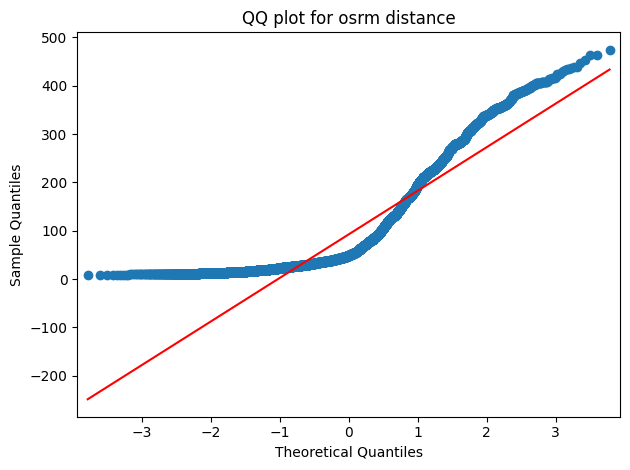

In [651]:
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['osrm_distance'],line="s")
plt.title('QQ plot for osrm distance')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

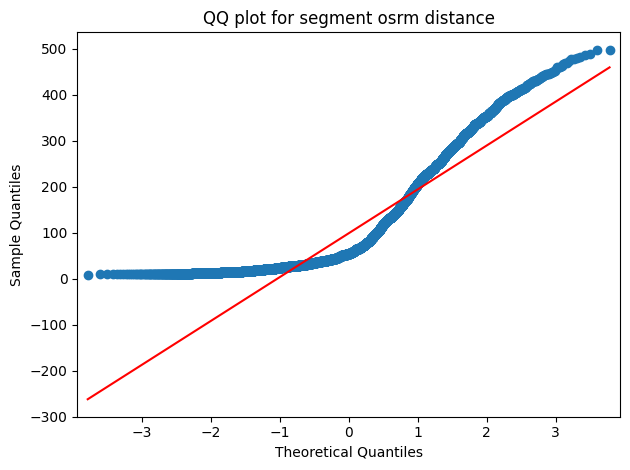

In [652]:
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['segment_osrm_distance_sum'], line="s")
plt.title('QQ plot for segment osrm distance')
plt.tight_layout()
plt.show()

Samples do not follow normal distribution

####Apply Shapiro-Wilk test

Ho: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality



In [653]:
test_stat, p_value = shapiro(trip['osrm_distance'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.8203009811114866e-51
The sample does not follow normal distribution


In [654]:
test_stat, p_value = shapiro(trip['segment_osrm_distance_sum'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.618720532885107e-52
The sample does not follow normal distribution


####Homogeneity of Variances using Lavene's test

In [655]:
from scipy.stats import levene
test_stat, p_value = levene(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.246011259053651e-05
The samples do not have  Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [656]:
H0="There is no difference between osrm distance and segment_osrm distance."

Ha="There is significant difference between osrm distance and segment_osrm distance."
alpha = 0.05

u_stat, p_value = mannwhitneyu(trip['osrm_distance'], trip['segment_osrm_distance_sum'])

print('Test Statistic:', u_stat)
print('P value:', p_value)

if p_value < alpha:
  print("Result: \nReject null hypothesis. \nThere is significant difference between osrm distance and segment_osrm distance.")
else:
  print("Result: \nFail to reject null hypothesis. \n There is no difference between osrm distance and segment_osrm distance.")

Test Statistic: 78081822.0
P value: 1.773217099903382e-08
Result: 
Reject null hypothesis. 
There is significant difference between osrm distance and segment_osrm distance.


Insights: it can be concluded that osrm_distance and segment_osrm_distance are not similar.

The hypothesis test result confirms our observation from the visual analysis

###d. OSRM time aggregated value and segment OSRM time aggregated value.

Null Hypothesis - There is no difference between osrm time and segment_osrm time.

Alternative Hypothesis - There is significant difference between osrm time and segment_osrm time.

Visual Tests to know if the samples follow normal distribution

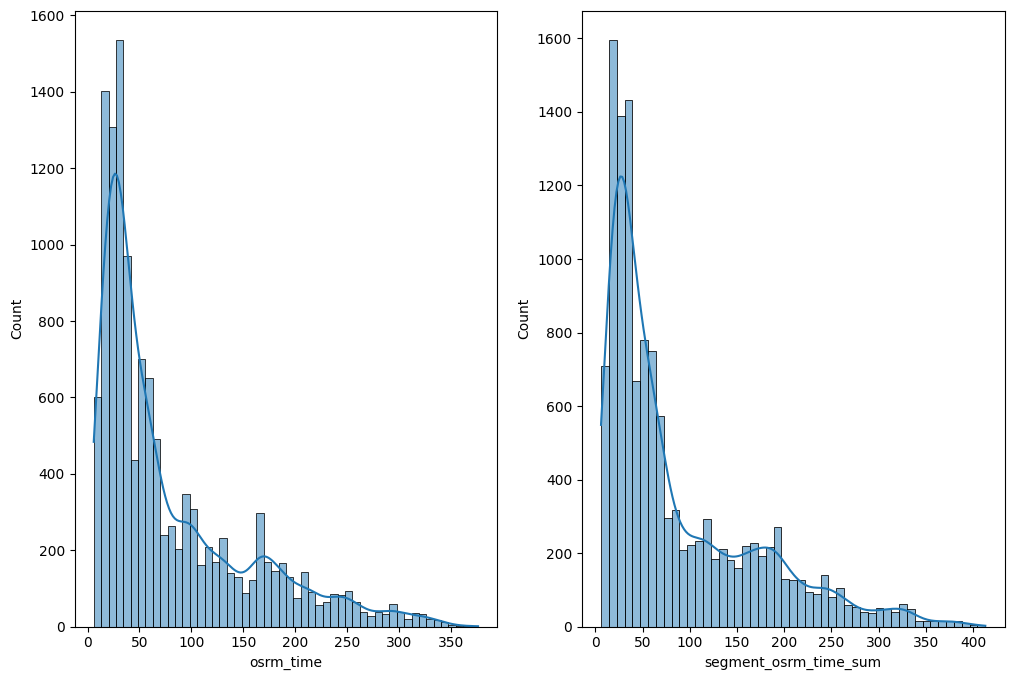

In [657]:
#distribution of osrm distance and segment osrm distance
plt.figure(figsize = (12, 8))
plt.subplot(1,2,1)
sns.histplot(data = trip['osrm_time'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data=trip['segment_osrm_time_sum'], kde=True)
plt.show()

The distributions are right skewed

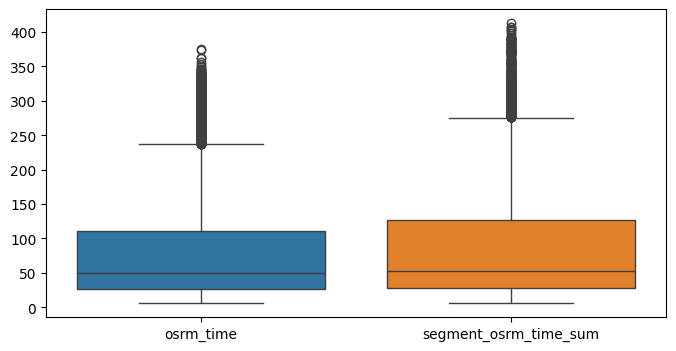

In [658]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = trip[['osrm_time','segment_osrm_time_sum']])
plt.show()

The boxplot and the lineplot of 1000 trips shows that osrm_time is lesser than segment_osrm_time



<Figure size 1000x400 with 0 Axes>

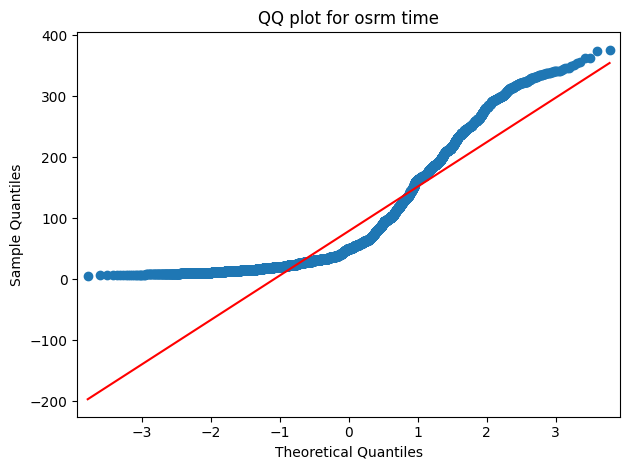

In [659]:
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['osrm_time'],line="s")
plt.title('QQ plot for osrm time')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

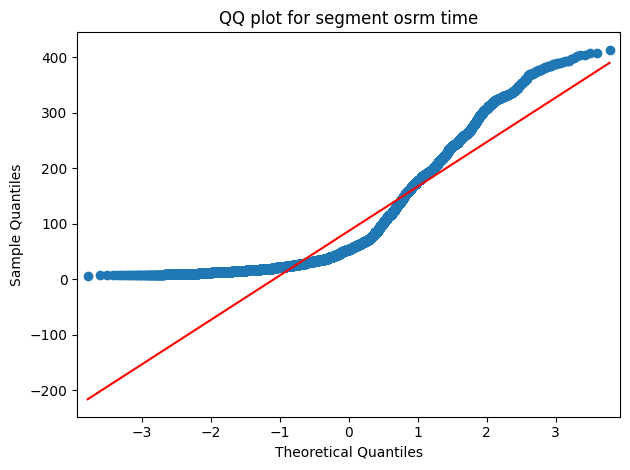

In [660]:
#Distribution check using QQ Plot
plt.figure(figsize=(10, 4))
sm.qqplot(trip['segment_osrm_time_sum'], line="s")
plt.title('QQ plot for segment osrm time')
plt.tight_layout()
plt.show()

samples do not follow normal distribution

####Apply Shapiro-Wilk test

Ho: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [661]:
test_stat, p_value = shapiro(trip['osrm_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.11797801017103e-50
The sample does not follow normal distribution


In [662]:
test_stat, p_value = shapiro(trip['segment_osrm_time_sum'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.4392109875757093e-49
The sample does not follow normal distribution


####Homogeneity of Variances using Lavene's test

In [663]:
from scipy.stats import levene
test_stat, p_value = levene(trip['osrm_time'], trip['segment_osrm_time_sum'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 7.146289584700569e-14
The samples do not have  Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples

In [664]:
Ho="There is no difference between osrm time and segment_osrm time."

Ha="There is significant difference between osrm time and segment_osrm time."
alpha = 0.05

u_stat, p_value = mannwhitneyu(trip['osrm_time'], trip['segment_osrm_time_sum'])

print('Test Statistic:', u_stat)
print('P value:', p_value)

if p_value < alpha:
  print("Result: \nReject null hypothesis. \nThere is significant difference between osrm time and segment_osrm time.")
else:
  print("Result: \nFail to reject null hypothesis. \n There is no difference between osrm time and segment_osrm time.")

Test Statistic: 77704262.0
P value: 3.501031561380257e-10
Result: 
Reject null hypothesis. 
There is significant difference between osrm time and segment_osrm time.


Insights: It can be concluded that osrm_time and segment_osrm_time are not similar

The hypothesis test result confirms our observation from the visual analysis

##2. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [665]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trip[num_cols] = scaler.fit_transform(trip[num_cols])

#6. Business Insights & Recommendations

## Patterns observed in the data along with what you can infer from them.

###1. Checking from where most orders are coming from (State, Corridor, etc.)

In [666]:
trip[["trip_uuid","source_center", "destination_center","source_city", "destination_city"]].nunique()

trip_uuid             12759
source_center           909
destination_center     1010
source_city             692
destination_city        812
dtype: int64

In [667]:
order_state= trip["destination_state"].value_counts()
order_state.head(10)

destination_state
maharashtra      2286
karnataka        2070
haryana          1337
tamil nadu       1040
telangana         682
gujarat           653
uttar pradesh     625
delhi             574
west bengal       559
punjab            549
Name: count, dtype: int64

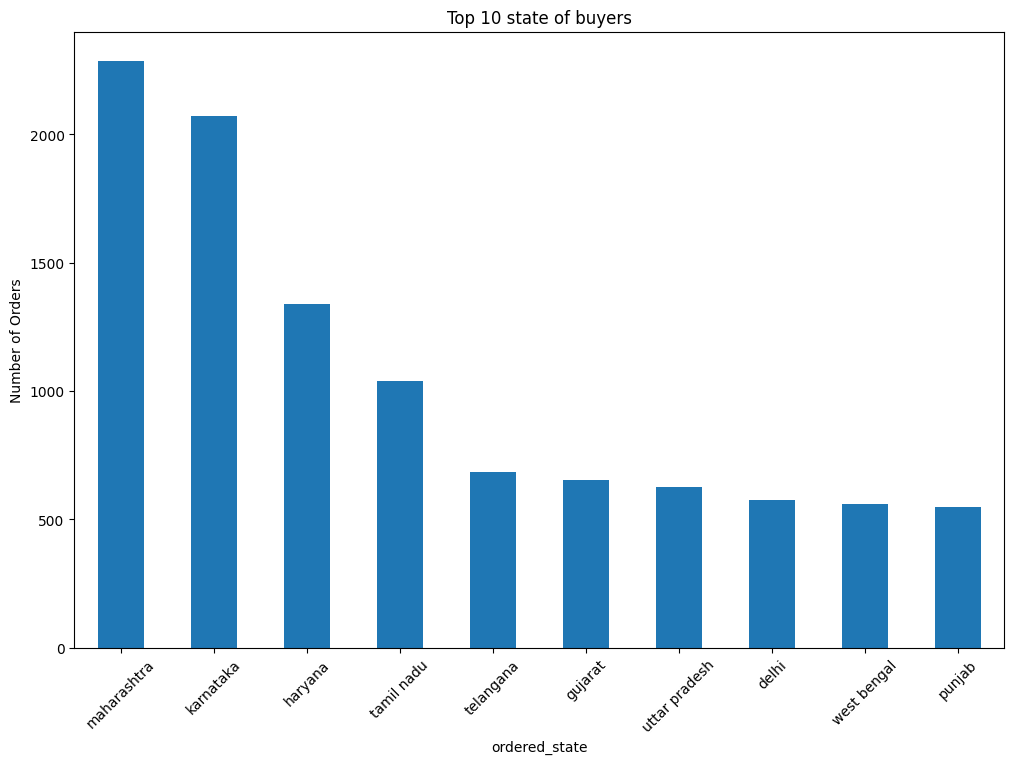

In [668]:
# Plot the top 10 states
plt.figure(figsize=(12, 8))
order_state.head(10).plot(kind='bar')
plt.title('Top 10 state of buyers')
plt.xlabel('ordered_state')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Insights: highest number of orders comes from Maharashtra, followed by Karnataka, Haryana, Tamil Nadu, and telangana.

In [669]:
order_state= trip["destination_city"].value_counts()
order_state.head(10)

destination_city
bengaluru     1206
mumbai         967
gurgaon        611
delhi          471
hyderabad      411
chennai        410
bangalore      389
bhiwandi       377
pune           326
chandigarh     314
Name: count, dtype: int64

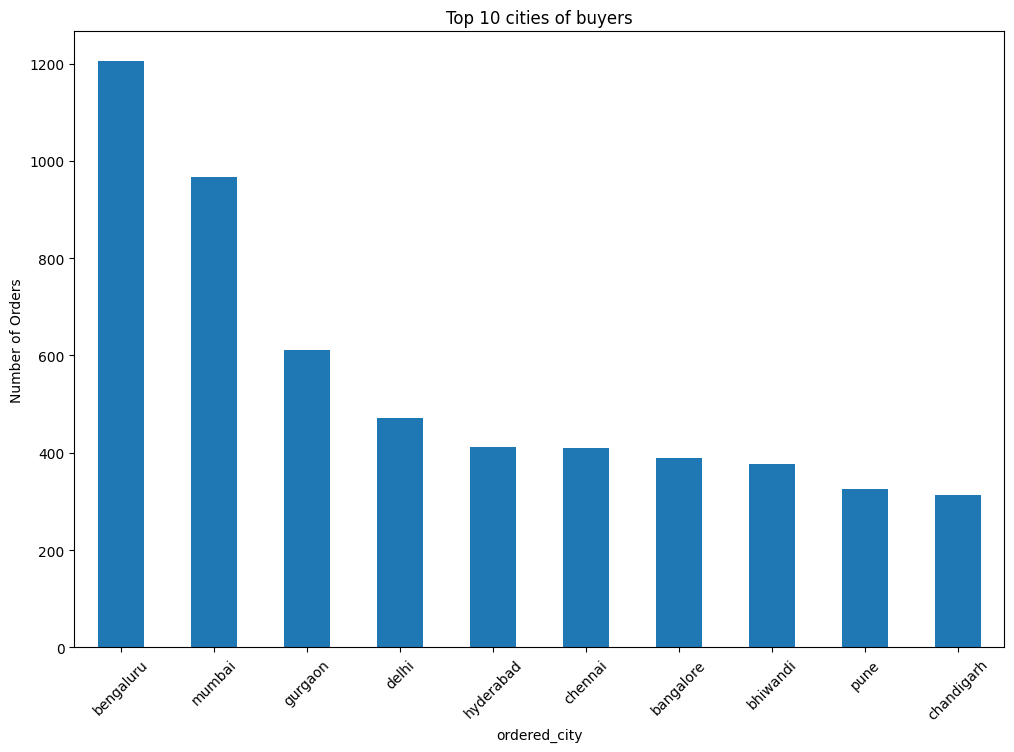

In [670]:
# Plot the top 10 cities
plt.figure(figsize=(12, 8))
order_state.head(10).plot(kind='bar')
plt.title('Top 10 cities of buyers')
plt.xlabel('ordered_city')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

Insights: Most of the orders come from cities like Bengaluru, Mumbai, Gurgaon, Delhi and Hydrabad.

###2. Busiest corridor, avg distance between them, avg time taken, etc

To find the busiest corridor, look at the source_name and destination_name fields and count trips between these locations.

In [671]:
busiest_corridor=trip.groupby(['source_name','destination_name'])['trip_uuid'].count().sort_values(ascending=False).reset_index()
busiest_corridor.head(10)

,source_name,destination_name,trip_uuid
0,bangalore_nelmngla_h (karnataka),bengaluru_kgairprt_hb (karnataka),151
1,bengaluru_bomsndra_hb (karnataka),bengaluru_kgairprt_hb (karnataka),121
2,bengaluru_kgairprt_hb (karnataka),bangalore_nelmngla_h (karnataka),108
3,bhiwandi_mankoli_hb (maharashtra),mumbai hub (maharashtra),105
4,mumbai_chndivli_pc (maharashtra),bhiwandi_mankoli_hb (maharashtra),99
5,bangalore_nelmngla_h (karnataka),bengaluru_bomsndra_hb (karnataka),97
6,gurgaon_bilaspur_hb (haryana),sonipat_kundli_h (haryana),92
7,sonipat_kundli_h (haryana),gurgaon_bilaspur_hb (haryana),86
8,bengaluru_kgairprt_hb (karnataka),bengaluru_bomsndra_hb (karnataka),86
9,bengaluru_bomsndra_hb (karnataka),bangalore_nelmngla_h (karnataka),79


corridor
bangalore_nelmngla_h (karnataka) to bengaluru_kgairprt_hb (karnataka)     151
bengaluru_bomsndra_hb (karnataka) to bengaluru_kgairprt_hb (karnataka)    121
bengaluru_kgairprt_hb (karnataka) to bangalore_nelmngla_h (karnataka)     108
bhiwandi_mankoli_hb (maharashtra) to mumbai hub (maharashtra)             105
mumbai_chndivli_pc (maharashtra) to bhiwandi_mankoli_hb (maharashtra)      99
bangalore_nelmngla_h (karnataka) to bengaluru_bomsndra_hb (karnataka)      97
gurgaon_bilaspur_hb (haryana) to sonipat_kundli_h (haryana)                92
bengaluru_kgairprt_hb (karnataka) to bengaluru_bomsndra_hb (karnataka)     86
sonipat_kundli_h (haryana) to gurgaon_bilaspur_hb (haryana)                86
bengaluru_bomsndra_hb (karnataka) to bangalore_nelmngla_h (karnataka)      79
Name: count, dtype: int64


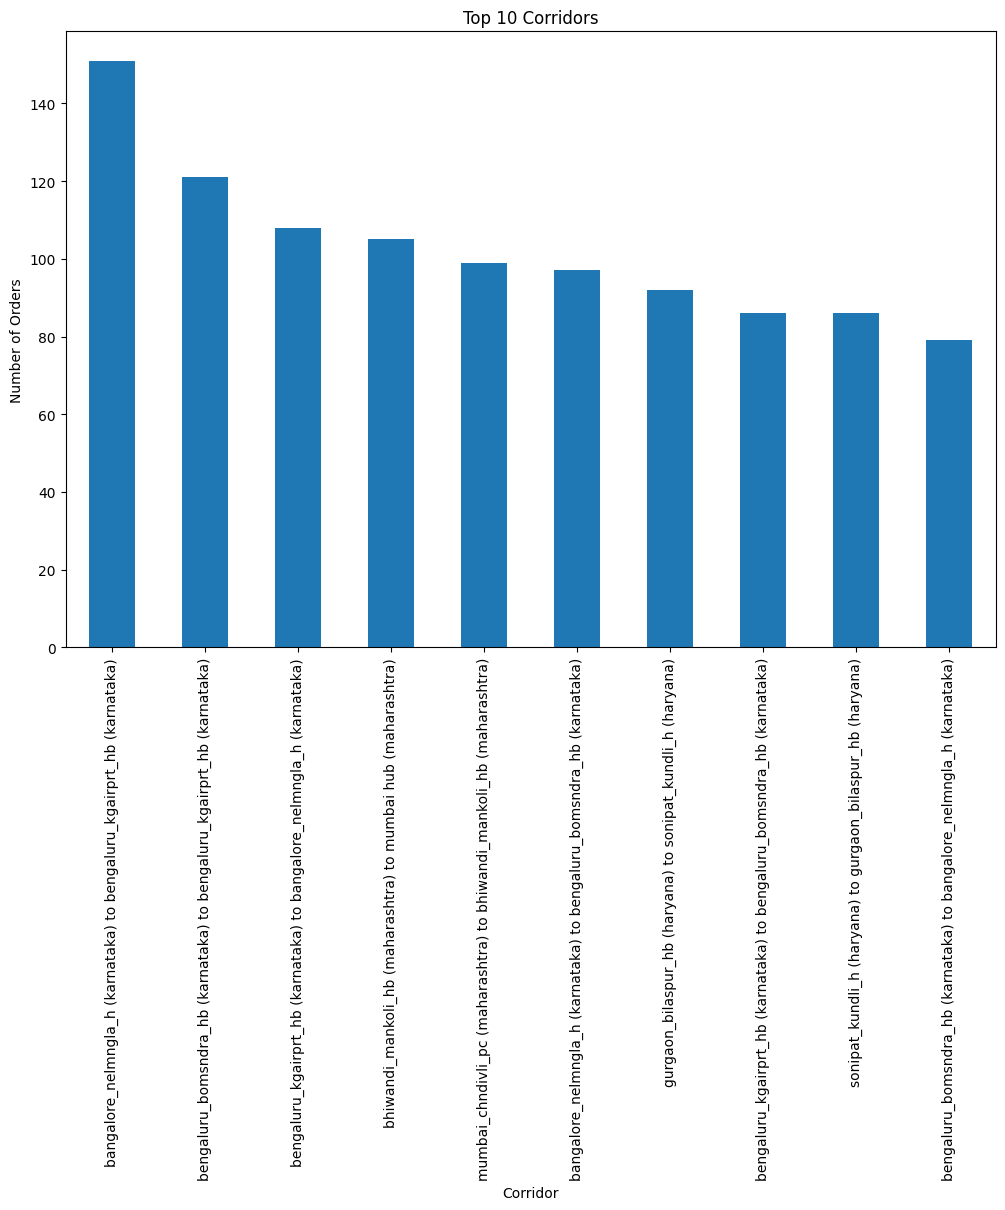

In [672]:
# Create a 'corridor' field combining source and destination
trip['corridor'] = trip['source_name'] + ' to ' + trip['destination_name']

# Count the number of trips for each corridor
corridor_counts = trip['corridor'].value_counts()

# Display the top 10 corridors
print(corridor_counts.head(10))

# Plot the top 10 corridors
plt.figure(figsize=(12, 8))
corridor_counts.head(10).plot(kind='bar')
plt.title('Top 10 Corridors')
plt.xlabel('Corridor')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

In [673]:
# Group by corridor and calculate average distance and time
corridor_stats = trip.groupby('corridor').agg({'actual_distance_to_destination': 'mean','actual_time': 'mean'}).reset_index()

# Display the top 10 corridors by average distance
print(corridor_stats.sort_values(by='actual_distance_to_destination', ascending=False).head(10))


                                               corridor  \
1772  sikar_fatehprd_i (rajasthan) to didwana_katlad...   
1167  kolkata_dankuni_hb (west bengal) to bhubaneshw...   
1375             moga_dpc (punjab) to moga_dpc (punjab)   
575   delhi_airport_h (delhi) to hathras (uttar prad...   
512   chomu_shsmldpp_d (rajasthan) to jaipur_hub (ra...   
639   dhule_midcavdn_i (maharashtra) to dhule_midcav...   
171   bangalore_nelmngla_h (karnataka) to davangere_...   
84    anantapur_kamastrt_i (andhra pradesh) to cudda...   
174   bangalore_nelmngla_h (karnataka) to hubli_adar...   
1742  sendhwa_vishnuvhr_d (madhya pradesh) to bhiwan...   

      actual_distance_to_destination  actual_time  
1772                        4.142566     2.938372  
1167                        4.046282     2.404059  
1375                        4.039271     4.000714  
575                         4.034927     3.636123  
512                         3.997119     2.919514  
639                         3.860131  

<ipython-input-674-de7dbd16666b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_corridors['corridor'], rotation=90)


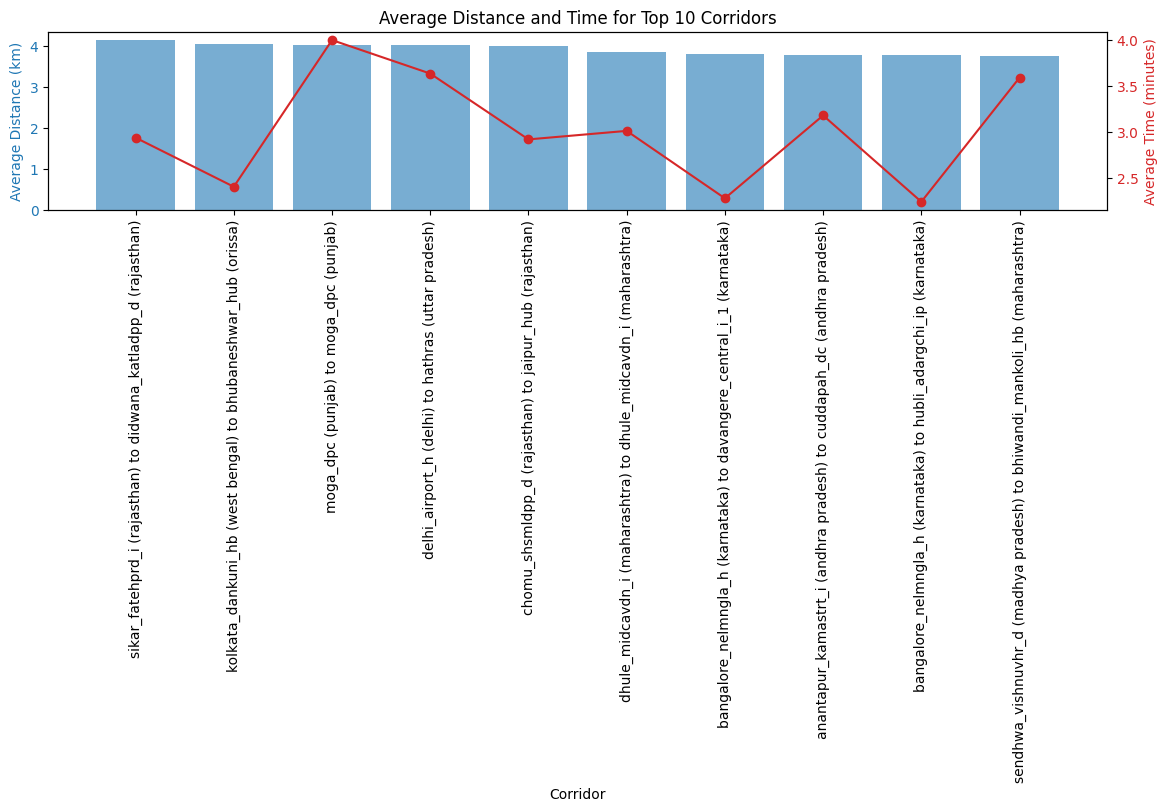

In [674]:
# Plot average distance and time for top 10 corridors
top_corridors = corridor_stats.sort_values(by='actual_distance_to_destination', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Corridor')
ax1.set_ylabel('Average Distance (km)', color=color)
ax1.bar(top_corridors['corridor'], top_corridors['actual_distance_to_destination'], color=color, alpha=0.6, label='Average Distance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_corridors['corridor'], rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Time (minutes)', color=color)
ax2.plot(top_corridors['corridor'], top_corridors['actual_time'], color=color, marker='o', label='Average Time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Distance and Time for Top 10 Corridors')
plt.show()

Insights: bangalore_nelmngla_h (karnataka) to davangere_central_i_1_(karnataka) require less time as the distance is short.

These average time and distrance mitrices help to highlight areas like moga_dpc(panjab) to moga_dpc(panjab) for improvement in route planning and logistics.

# Business Insights:



*   Most of the data is used for testing rather than training, with Carting being the most common route type.

*   The data covers the period from September 12, 2018, to October 8, 2018, and includes 12,759 unique trip IDs, 909 source centers, 1,010 destination centers, 692 source cities, and 812 destination cities. Testing data is more common than training data.

*   The actual_time and osrm_time features show significant differences.

*   The actual_time and segment_actual_time features are quite similar.
*   List item


*   The osrm_distance and segment_osrm_distance features show significant differences from each other.


*   The osrm time and segment_osrm time features also show significant differences from each other.


*   Most orders come from states such as Maharashtra, Karnataka, Haryana, Tamil Nadu and Smaller states like Arunachal Pradesh, Nagaland, Himachal, Goa etc have the lowest volumes as expected.

*   Most orders come from cities such as Bengaluru, Mumbai, Gurgaon, Delhi, and Hyderabad.

*   Trips mostly start from states like Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.

*   Mumbai has the highest number of trips starting there, followed by Gurgaon, Delhi, Bengaluru, and Bhiwandi, showing these cities have a strong seller presence.

*   South, North and West Zones corridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone.

*   Average time and distance metrics suggest that areas like Moga_DPC in Punjab could improve route planning and logistics.





#Recommendations:

* A large volume of orders either starts from or is directed to states such as Maharashtra, Karnataka, Haryana, and Tamil Nadu. Improving the efficiency of current routes could boost service coverage in these regions.

* Profiling customers in Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh is important. Gaining insights into why these states generate a high number of orders can help enhance both the purchasing and delivery processes for customers.

* When planning, it’s important to consider state-specific challenges such as heavy traffic and difficult terrain, especially during busy festival periods, to better meet demand.

* The OSRM trip planning system needs improvements to fix discrepancies, particularly for transporters who depend on this system for accurate routing.

* There is a noticeable gap between osrm_time and actual_time. Reducing this discrepancy is essential to improve delivery time predictions and provide more accurate estimates to customers.

* Optimise routes along corridors with maximum average speed to shorten delivery time

## Actionable Items for the business.


### Optimize Routes:
If certain corridors have higher average times or distances, consider optimizing these routes to improve efficiency.

###Focus on High-Volume Sources:
Increase resources or improve services in regions that are the primary sources of orders.

###Address Bottlenecks:
For corridors with unusually high average times or distances, investigate potential issues such as traffic patterns or inefficiencies.

###Improve Forecasting:
Use insights from busy corridors and high-volume sources to better forecast demand and plan logistics.


By implementing these analyses and insights, businesses can make data-driven decisions to enhance operational efficiency and customer satisfaction.